**_ЗАДАЧА РАЗРАБОТКИ СТРАТЕГИИ ОПТИМИЗАЦИИ ЦЕН_**

Оптимизация розничных цен означает поиск идеального баланса между ценой, которую вы взимаете за свои продукты, и количеством продуктов, которые вы можете продать по этой цене.


 Датасет https://www.kaggle.com/datasets/suddharshan/retail-price-optimization

**Описание:**

- product_id - Уникальный идентификатор для каждого продукта в наборе данных
- product_category_name - Название категории продукта, к которой относится продукт
- month_year - Месяц и год розничной транзакции или записи данных
- Количество - Количество продукта, проданного или приобретенного в данной транзакции
- total_price - Общая цена продукта, включая любые применимые налоги или скидки
- freight_price - Стоимость доставки или фрахта, связанных с продуктом
- цена за единицу - Цена одной единицы продукта
- product_name_length - Длина названия продукта с точки зрения количества символов.
- product_description_length - Длина описания продукта с точки зрения количества символов.
- product_photos_qty - Количество доступных фотографий для продукта в наборе данных.
- product_weight_g - Вес продукта в граммах.
- product_score - Оценка или рейтинг, связанные с качеством, популярностью продукта или другими соответствующими факторами.
- customers - количество клиентов, которые приобрели продукт в данной транзакции.
- weekday - день недели, в который произошла транзакция.
- weekend - двоичный флаг, указывающий, произошла ли транзакция в выходные дни (1) или нет (0).
- holiday - двоичный флаг, указывающий, произошла ли транзакция в праздник (1) или нет (0).
- month - месяц, в котором произошла транзакция.
- год - год, в котором произошла транзакция.
- s - эффект сезонности
- comp_1, comp_2, comp_3 -Информация о конкурентах или переменные, связанные с ценами, акциями или другими 
соответствующими факторами конкурентов.
- ps1, ps2, ps3 - Оценка продукта или рейтинг, связанный с продуктами конкурентов.
- fp1, fp2, fp3 - Расходы на перевозку или доставку, связанные с продукцией конкурентов.


## Load data and EDA

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('retail_price.csv')
data.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [3]:
data.shape

(676, 30)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [5]:
data.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [6]:
data.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


## Распределение цен на продукцию:


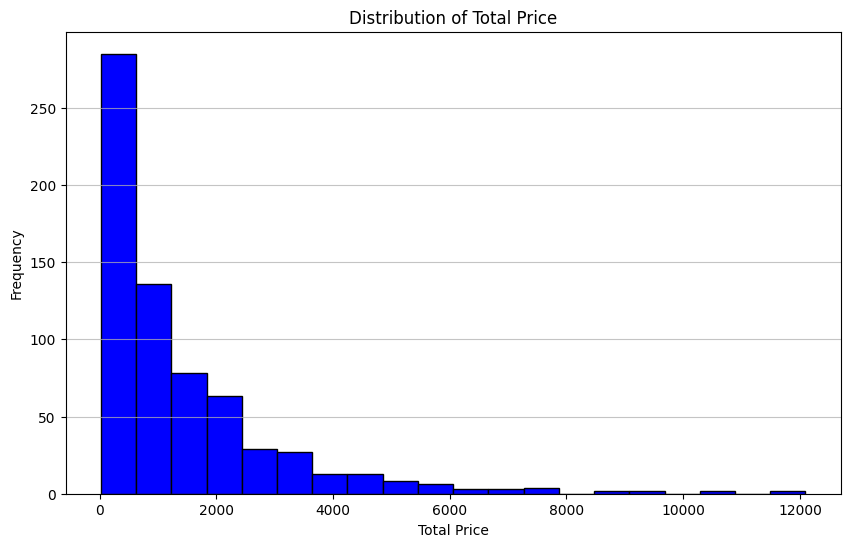

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(data['total_price'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.savefig('Distribution of Total Price.png')
plt.show()


## Распределение цен за единицу товара:

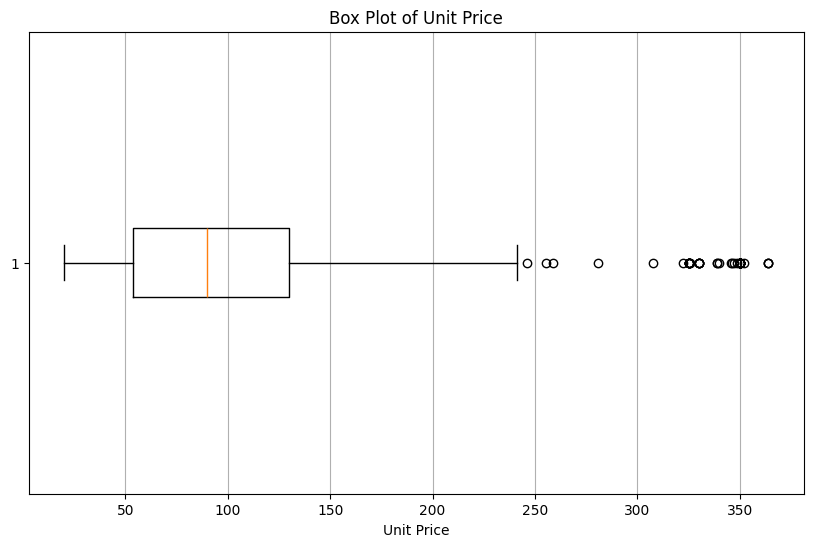

In [8]:

plt.figure(figsize=(10, 6))
plt.boxplot(data['unit_price'], vert=False)
plt.title('Box Plot of Unit Price')
plt.xlabel('Unit Price')
plt.grid(axis='x')
plt.savefig('Box Plot of Unit Price.png')
plt.show()


## Cоотношение между количеством и общими ценами:

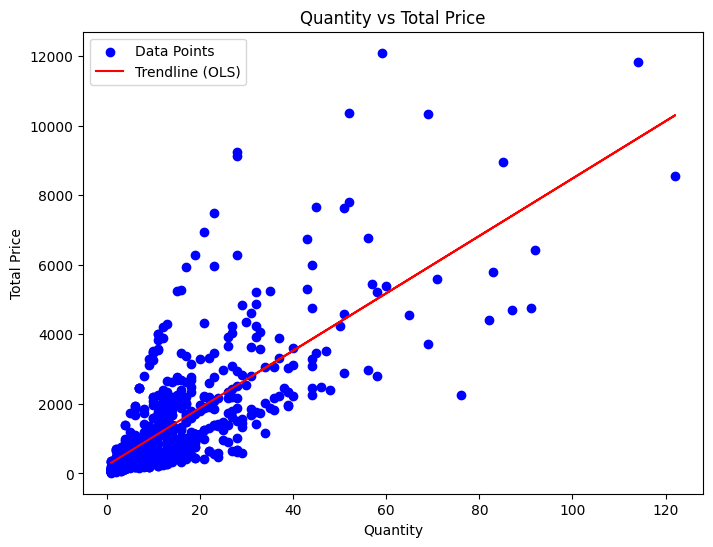

In [9]:

import statsmodels.api as sm


x = data['qty']
y = data['total_price']

# Создаем график рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data Points')

# Добавляем линию тренда с помощью OLS
X = sm.add_constant(x)  # Добавляем константу для OLS

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.plot(x, predictions, color='red', label='Trendline (OLS)')


plt.title('Quantity vs Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')


plt.legend()

plt.savefig('Quantity vs Total Price.png')
plt.show()


Таким образом, связь между количеством и общими ценами линейна. 
Это указывает на то, что структура цен основана на фиксированной цене за единицу,
где общая цена рассчитывается путем умножения количества на цену за единицу. 


In [10]:
# Группируем данные по категориям продуктов и вычисляем среднюю общую цену
avg_total_price = data.groupby('product_category_name')['total_price'].mean().reset_index()

## Cредние,общие цены по категориям продуктов:

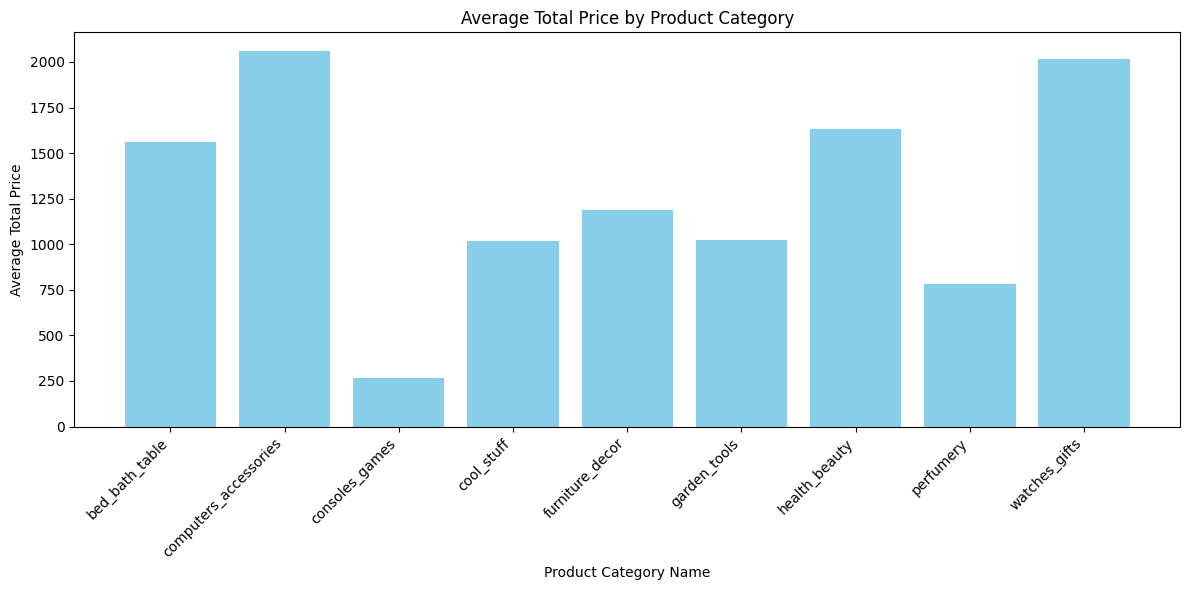

In [11]:
# Создаем график
plt.figure(figsize=(12, 6))
plt.bar(avg_total_price['product_category_name'], avg_total_price['total_price'], color='skyblue')
plt.xlabel('Product Category Name')
plt.ylabel('Average Total Price')
plt.title('Average Total Price by Product Category')
plt.xticks(rotation=45, ha='right')  # Поворачиваем метки по оси X для удобства чтения
plt.tight_layout() 
plt.savefig('Average Total Price by Product Category.png')
plt.show()


## Rаспределение общих цен по дням недели

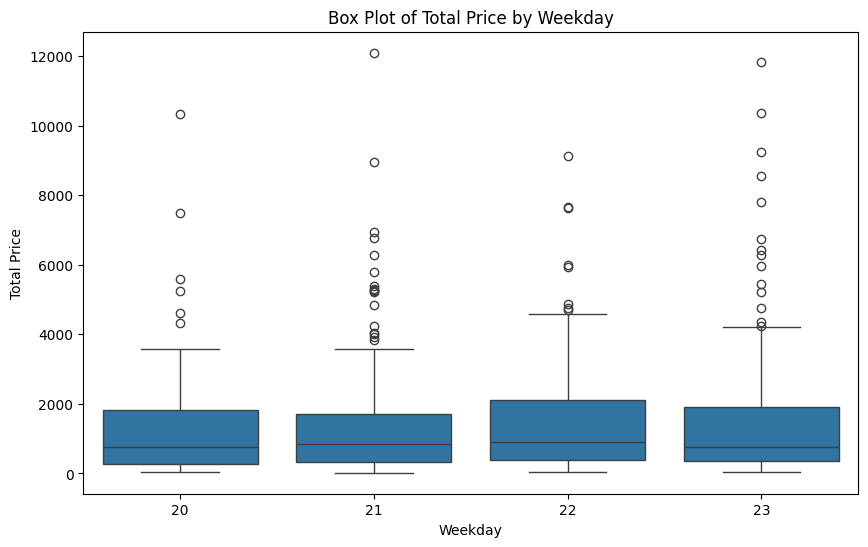

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='total_price', data=data)
plt.title('Box Plot of Total Price by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Price')
plt.savefig('Box Plot of Total Price by Weekday.png')
plt.show()


## Распределение общих цен по праздникам :

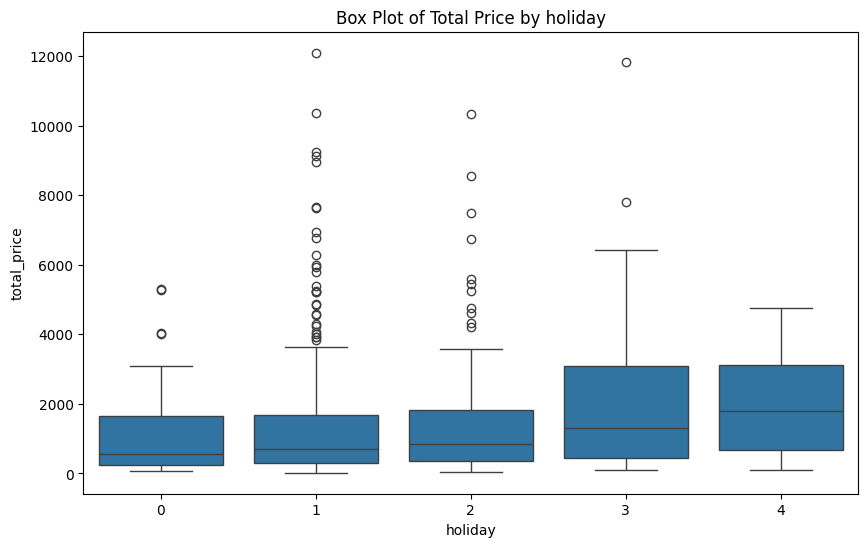

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='holiday',y='total_price',data=data)

plt.title('Box Plot of Total Price by holiday')
plt.xlabel('holiday')
plt.ylabel('total_price')

plt.savefig('Box Plot of Total Price by holiday.png')
plt.show()

## Корреляция числовых характеристик друг с другом:

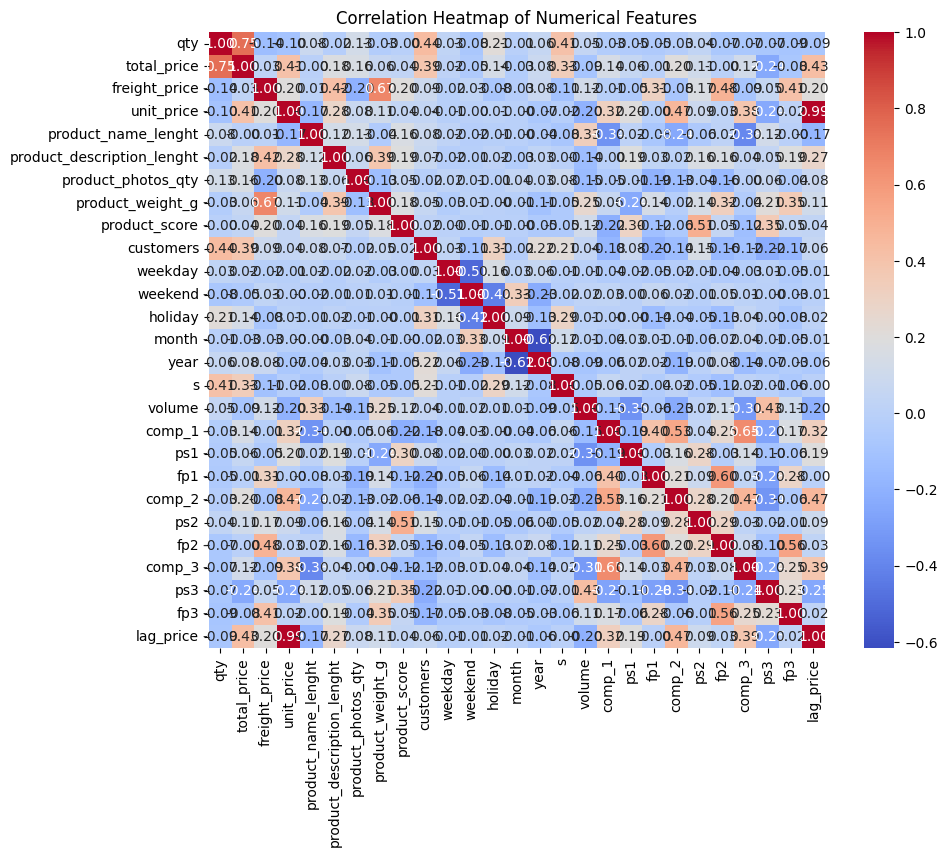

In [14]:
# Сначала отфильтруем только числовые столбцы
numerical_data = data.select_dtypes(include=['number'])

# Вычисляем корреляционную матрицу
correlation_matrix = numerical_data.corr()

# Создаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


## Рассчитаем среднюю разницу в ценах конкурентов по категориям продуктов

Анализ ценовых стратегий конкурентов имеет важное значение для оптимизации розничных цен. 
Мониторинг и сравнение с ценами конкурентов могут помочь выявить возможности для установления конкурентоспособных цен, 
либо путем установления цен ниже или выше конкурентов,  в зависимости от позиционирования и стратегии ритейлера.


In [15]:


data['comp_price_diff'] = data['unit_price'] - data['comp_1'] 

avg_price_diff_by_category = data.groupby('product_category_name')['comp_price_diff'].mean().reset_index()


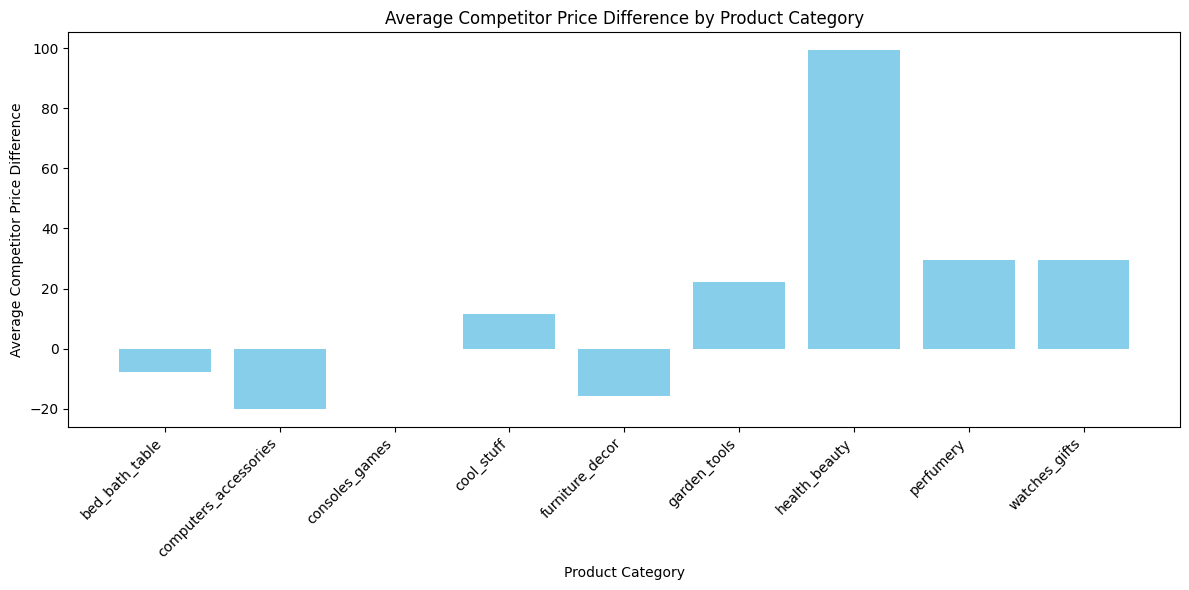

In [16]:


plt.figure(figsize=(12, 6))
plt.bar(avg_price_diff_by_category['product_category_name'], 
        avg_price_diff_by_category['comp_price_diff'], 
        color='skyblue')

plt.title('Average Competitor Price Difference by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Competitor Price Difference')
plt.xticks(rotation=45, ha='right')  # Поворачиваем метки по оси X для лучшей читаемости
plt.tight_layout() 
plt.savefig('Average Competitor Price Difference by Product Category.png')
plt.show()


## Oбучим модель машинного обучения 


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = data[['qty', 'unit_price', 'comp_1', 
          'product_score', 'comp_price_diff']]
y = data['total_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

# Train a linear regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
y_pred = model.predict(X_test)

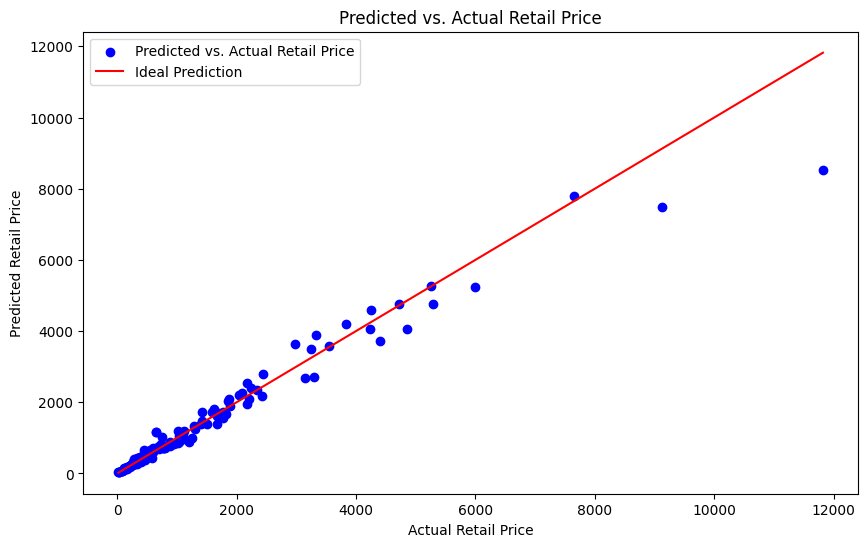

In [19]:


plt.figure(figsize=(10, 6))

# Наносим точки для предсказанных и фактических цен
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual Retail Price')

# Наносим линию идеального предсказания
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction')

# Настраиваем заголовок и метки осей
plt.title('Predicted vs. Actual Retail Price')
plt.xlabel('Actual Retail Price')
plt.ylabel('Predicted Retail Price')

# Добавляем легенду
plt.legend()
plt.savefig('Predicted vs. Actual Retail Price.png')
plt.show()


In [20]:
# Создаем DataFrame для отображения фактических и предсказанных цен
results = pd.DataFrame({
    'Actual Retail Price': y_test,
    'Predicted Retail Price': y_pred
})


results.head(10)


,Actual Retail Price,Predicted Retail Price
641,3139.80,2680.00
302,1819.86,1668.50
369,99.90,101.00
493,2179.00,2537.19
579,299.97,299.97
54,477.10,499.00
645,4860.11,4047.30
257,4397.70,3711.70
663,550.80,658.90
478,735.00,840.00


In [21]:

# Дополнительно можно вывести средние значения
print("\nAverage Actual Retail Price:", y_test.mean())
print("Average Predicted Retail Price:", y_pred.mean())



Average Actual Retail Price: 1340.3211764705882
Average Predicted Retail Price: 1303.9175735294116


Конечная цель оптимизации розничных цен — назначить цену, которая поможет вам заработать больше всего денег и привлечь достаточно клиентов для покупки ваших продуктов. Это включает в себя использование данных и стратегий ценообразования для поиска правильной цены, которая максимизирует ваши продажи и прибыль, сохраняя при этом клиентов довольными. 